## Mga Pangunahing Halimbawa ng Pandas

Ang notebook na ito ay magpapakita sa iyo ng ilang napakapayak na konsepto ng Pandas. Magsisimula tayo sa pag-import ng mga karaniwang library para sa data science:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Serye

Ang serye ay parang isang listahan o 1D-array, ngunit may index. Lahat ng operasyon ay naka-align sa index.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Isa sa mga karaniwang gamit ng serye ay ang **time series**. Sa time series, ang index ay may espesyal na istruktura - karaniwang hanay ng mga petsa o oras. Maaari tayong gumawa ng ganitong index gamit ang `pd.date_range`.

Halimbawa, mayroon tayong serye na nagpapakita ng dami ng produktong binibili araw-araw, at alam natin na tuwing Linggo kailangan din nating kumuha ng isang item para sa sarili natin. Ganito ang paraan para i-modelo iyon gamit ang serye:


Length of index is 366


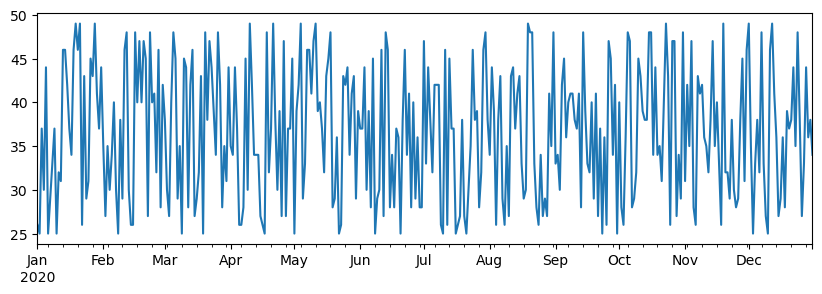

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Tulad ng nakikita mo, nagkakaroon tayo ng mga problema dito, dahil sa lingguhang serye, ang mga araw na hindi nabanggit ay itinuturing na nawawala (`NaN`), at ang pagdaragdag ng `NaN` sa isang numero ay nagbibigay sa atin ng `NaN`. Upang makuha ang tamang resulta, kailangan nating tukuyin ang `fill_value` kapag nagdaragdag ng mga serye:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


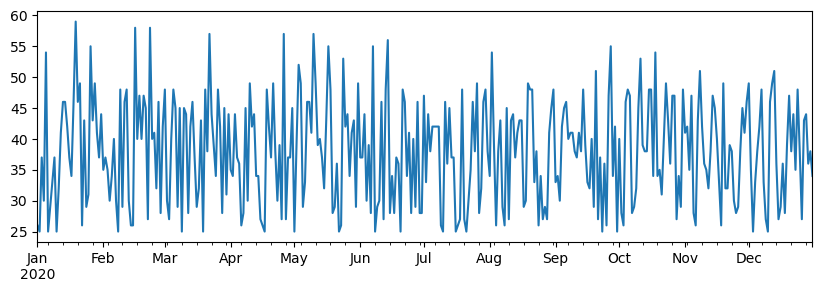

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

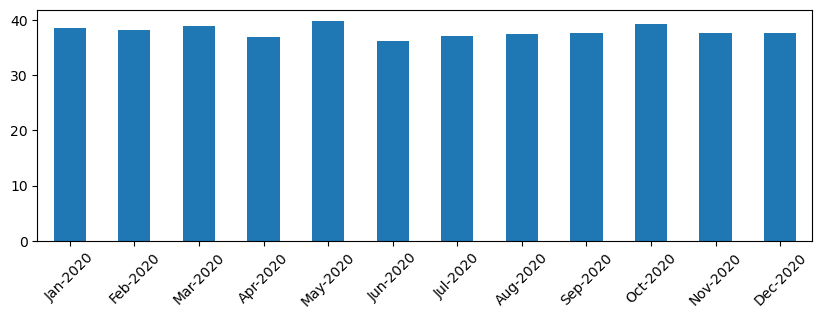

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Ang isang dataframe ay mahalagang koleksyon ng mga serye na may parehong index. Maaari nating pagsamahin ang ilang serye upang makabuo ng isang dataframe. Halimbawa, ibinigay ang mga seryeng `a` at `b` na tinukoy sa itaas:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Maaari rin nating gamitin ang Series bilang mga kolum, at tukuyin ang mga pangalan ng kolum gamit ang diksyunaryo:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Ang parehong resulta ay maaaring makamit sa pamamagitan ng pag-transpose (at pagkatapos ay pagpapalit ng pangalan ng mga column, upang tumugma sa naunang halimbawa):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Pagpili ng mga kolum** mula sa DataFrame ay maaaring gawin nang ganito:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Pagpili ng mga hilera** batay sa ekspresyong pansala:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Ang paraan ng paggana nito ay ang ekspresyong `df['A']<5` ay nagbabalik ng isang boolean series, na nagpapakita kung ang ekspresyon ay `True` o `False` para sa bawat elemento ng serye. Kapag ginamit ang serye bilang isang index, ibinabalik nito ang subset ng mga row sa DataFrame. Kaya't hindi posible na gumamit ng arbitraryong Python boolean expression, halimbawa, ang pagsusulat ng `df[df['A']>5 and df['A']<7]` ay magiging mali. Sa halip, dapat mong gamitin ang espesyal na operasyon na `&` sa boolean series:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

Paglikha ng mga bagong computable na kolum. Madali tayong makakalikha ng mga bagong computable na kolum para sa ating DataFrame gamit ang mga madaling maunawaang ekspresyon. Ang code sa ibaba ay kinakalkula ang divergence ng A mula sa karaniwang halaga nito.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Ang talagang nangyayari ay nagko-compute tayo ng isang serye, at pagkatapos ay itinalaga ang seryeng ito sa kaliwang bahagi, na lumilikha ng isa pang kolum.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

Ang **pagpili ng mga row batay sa mga numero** ay maaaring gawin gamit ang `iloc` na konstruksyon. Halimbawa, upang pumili ng unang 5 row mula sa DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Ang pag-grupo** ay madalas gamitin upang makakuha ng resulta na katulad ng *pivot tables* sa Excel. Halimbawa, nais nating kalkulahin ang mean value ng column `A` para sa bawat ibinigay na numero ng `LenB`. Maaari nating i-grupo ang ating DataFrame ayon sa `LenB`, at tawagin ang `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Kung kailangan nating kalkulahin ang mean at ang bilang ng mga elemento sa grupo, maaari nating gamitin ang mas kumplikadong `aggregate` na function:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Pagpi-print at Pag-plot

Madalas kailangang suriin ng Data Scientist ang datos, kaya mahalagang magawa itong maipakita. Kapag malaki ang DataFrame, madalas gusto lang nating tiyakin na tama ang ginagawa natin sa pamamagitan ng pagpi-print ng ilang unang mga hilera. Magagawa ito sa pamamagitan ng pagtawag sa `df.head()`. Kung ginagamit mo ito mula sa Jupyter Notebook, ipapakita nito ang DataFrame sa isang maayos na tabular na anyo.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Nakita rin natin ang paggamit ng `plot` function para maipakita ang ilang mga column. Bagama't napakakapal ng gamit ng `plot` para sa maraming gawain, at sumusuporta ito sa iba't ibang uri ng graph gamit ang `kind=` na parameter, maaari mo pa ring gamitin ang raw na `matplotlib` library para mag-plot ng mas kumplikadong bagay. Tatalakayin natin ang data visualization nang mas detalyado sa mga hiwalay na aralin ng kurso.


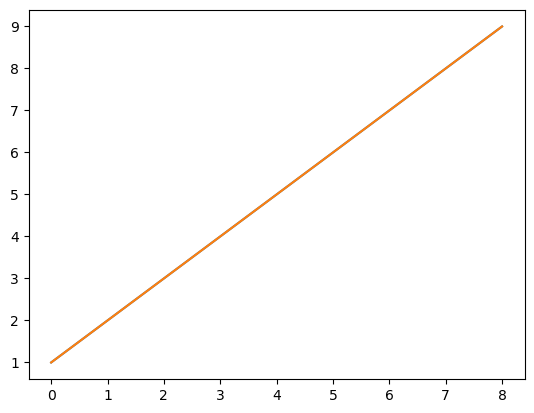

In [61]:
df['A'].plot()
plt.show()

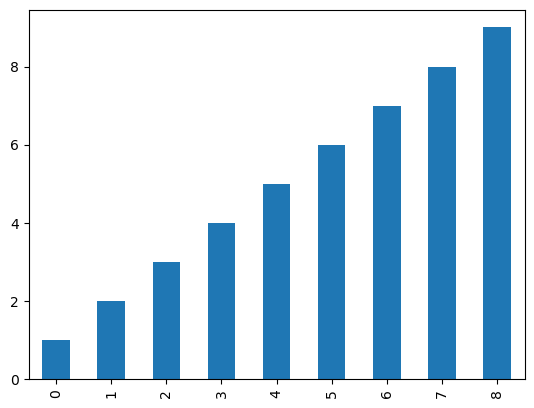

In [63]:
df['A'].plot(kind='bar')
plt.show()

Ang pangkalahatang-ideyang ito ay sumasaklaw sa mga pinakamahalagang konsepto ng Pandas, ngunit napakayaman ng library na ito, at walang hangganan sa kung ano ang maaari mong gawin dito! Ngayon, gamitin natin ang kaalamang ito upang lutasin ang isang tiyak na problema.



---

**Paunawa**:  
Ang dokumentong ito ay isinalin gamit ang AI translation service na [Co-op Translator](https://github.com/Azure/co-op-translator). Bagama't sinisikap naming maging tumpak, pakitandaan na ang mga awtomatikong pagsasalin ay maaaring maglaman ng mga pagkakamali o hindi pagkakatugma. Ang orihinal na dokumento sa kanyang katutubong wika ang dapat ituring na opisyal na sanggunian. Para sa mahalagang impormasyon, inirerekomenda ang propesyonal na pagsasalin ng tao. Hindi kami mananagot sa anumang hindi pagkakaunawaan o maling interpretasyon na maaaring magmula sa paggamit ng pagsasaling ito.
